Machine Learning Exercises

# Imports

In [1]:
import numpy as np
import pandas as pd
from numpy.polynomial import polynomial as P
from matplotlib import pyplot as plt

# Utilities

In [2]:
def white_noise(number, variance):
    noise = np.random.normal(loc=0.0, scale=variance, size=number)
    return noise

def create_points(number):
    x = np.linspace(start=0.0, stop=2.0, num=number)
    return x

def create_X(number, polynomial_degree, random=False):
    X = np.zeros((number, polynomial_degree + 1))
    for j in range(0, polynomial_degree + 1):
            X[:, j] = np.array(create_points(number))
            if random:
                temp = np.array(np.random.rand(number) * 2)
                X[:, j] = np.sort(temp)
            for i in range(0, number):
                X[i, j] = np.power(X[i, j], j)
    return X

def least_squares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

def ridge_regression(X, y, lamda):
    theta = np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y
    return theta

def mse(real, test):
    mse = np.square(real - test).mean()
    return mse

# Problem 1

## Problem 1 - Part 1

In [3]:
N = 20
variance = 0.1
theta_real = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2])

In [4]:
noise = white_noise(N, variance)

In [5]:
X = create_X(N, 5)

In [6]:
y = X @ theta_real.T

In [7]:
y += noise

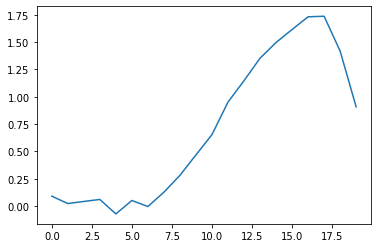

In [8]:
ax = plt.plot(y)

In [9]:
theta_least_squares = least_squares(X, y)
theta_least_squares.round(3)

array([ 0.084, -0.165, -1.081,  2.425, -0.556, -0.156])

In [10]:
real_set = create_X(1000, 5)
y_real = real_set @ theta_real.T
y_real += white_noise(1000, variance)

test_set = create_X(1000, 5, random=True)
y_test = test_set @ theta_least_squares.T

In [11]:
mse_test = mse(y_real, y_test)
mse_test.round(5)

0.07579

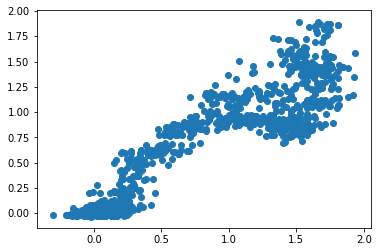

In [12]:
ax = plt.scatter(y_real, y_test)

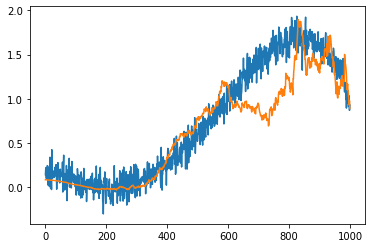

In [13]:
ax = plt.plot(y_real, markersize=0.5)
ax = plt.plot(y_test, markersize=0.5)

## Problem 1 - Part 2

In [14]:
X_2 = create_X(N, 2)
theta_least_squares_2 = least_squares(X_2, y)

X_10 = create_X(N, 10)
theta_least_squares_10 = least_squares(X_10, y)

In [15]:
theta_least_squares_2

array([-0.23467021,  0.88571466,  0.03811498])

In [16]:
theta_least_squares_10

array([ 8.77471722e-02, -3.76460952e+00,  5.27611556e+01, -3.05671847e+02,
        9.26865149e+02, -1.65994205e+03,  1.85553447e+03, -1.30580914e+03,
        5.60987133e+02, -1.34156085e+02,  1.36675360e+01])

In [17]:
points_exp_2 = np.zeros((100, 20))
points_exp_10 = np.zeros((100, 20))

for i in range(0, 100):
    noise = white_noise(N, variance)
    y_exp = X @ theta_real.T
    y_exp += noise
    theta_least_squares_2 = least_squares(X_2, y_exp)
    theta_least_squares_10 = least_squares(X_10, y_exp)
    y_2 = X_2 @ theta_least_squares_2.T
    y_10 = X_10 @ theta_least_squares_10.T
    points_exp_2[i] = y_2
    points_exp_10[i] = y_10

In [35]:
means_2 = np.mean(points_exp_2, axis=0)
variance_2 = np.var(points_exp_2, axis=0)
means_10 = np.mean(points_exp_10, axis=0)
variance_10 = np.var(points_exp_10, axis=0)

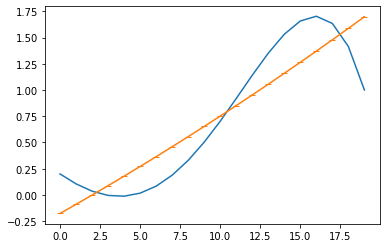

In [42]:
y_real_N = X @ theta_real.T

fig, ax = plt.subplots()
ax.plot(y_real_N, markersize=0.5)
ax.errorbar(range(0, 20), means_2, yerr=variance_2, marker='_')
plt.show()

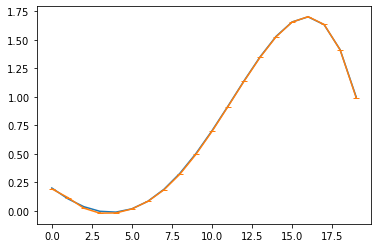

In [43]:
y_real_2 = X @ theta_real.T
fig, ax = plt.subplots()
ax.plot(y_real_N, markersize=0.5)
ax.errorbar(range(0, 20), means_10, yerr=variance_10, marker='_')
plt.show()

## Problem 1 - Part 3

In [44]:
I = np.identity(6)
lamda_tests = np.array([0, 0.01, 0.1, 0.5, 1, 2, 4, 6, 8, 10])
lamda_mse = np.zeros(10)

In [45]:
for lamda in lamda_tests:
    theta_ridge = ridge_regression(X, y, lamda)
    y_ridge = test_set @ theta_ridge.T
    mse_ridge = mse(y_real, y_ridge)
    lamda_mse[np.where(lamda_tests == lamda)] = mse_ridge

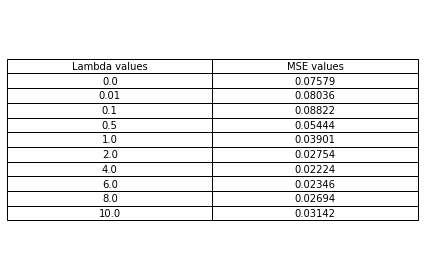

In [46]:
df = pd.DataFrame(np.column_stack((lamda_tests, lamda_mse.round(5))), 
                  columns=['Lambda values', 'MSE values'])

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.show()

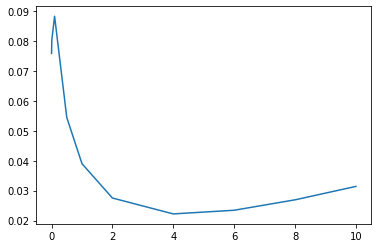

In [47]:
ax = plt.plot(lamda_tests, lamda_mse)

## Problem 1 - Part 4

In [ ]:
mean_gauss = theta_least_squares